<a href="https://colab.research.google.com/github/tiskutis/Brolis/blob/main/Classical_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [136]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
df = pd.read_csv('/content/drive/MyDrive/Brolis/Task/data_classical_statistics.csv')

In [138]:
df.head()

,i,x,y
0,1,4.653929,8.966984
1,2,8.724074,18.445580
2,3,2.602389,5.033882
3,4,7.429720,16.356571
4,5,2.521318,6.341565


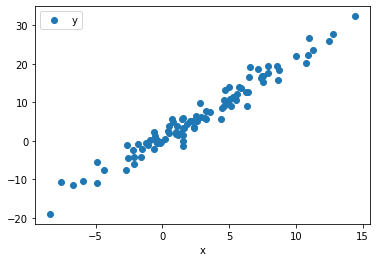

In [139]:
df.plot(x='x', y='y', linestyle = "None", marker='o')

a) Write the data generating process in matrix notation.

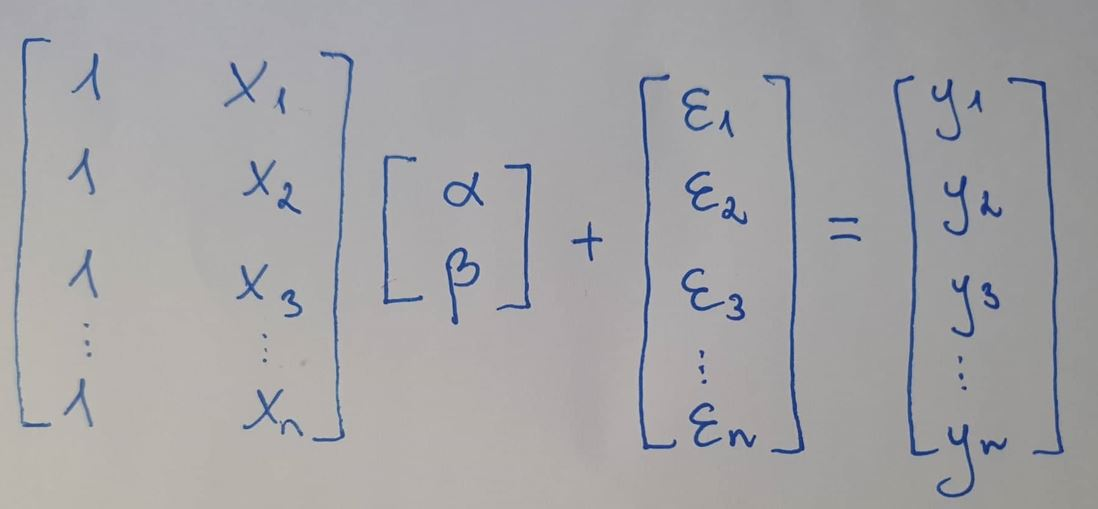

b) Write the formula for ordinary least squares estimator of α and β. Calculate the estimates using this formula. In picture below, β1 is β and β0 is α.

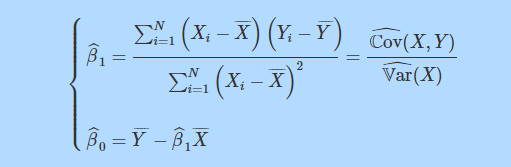

In [140]:
beta_est = np.cov(df.x, df.y, bias = True)[0][1] / np.var(df.x)
alpha_est = np.mean(df.y) - beta_est * np.mean(df.x)
print("Estimated alpha = " + str(alpha_est) + ". Estimated beta = " + str(beta_est))

Estimated alpha = 0.8141357294850868. Estimated beta = 2.0406878428929818


c) Fit the model using some ready made function in python (or R). Check if you get the same estimates of α and β. What is the estimate of σ?

In [141]:
lr = LinearRegression().fit(df.x.values.reshape(-1, 1), df.y)

Beta coefficient is 2.04068784: 

In [142]:
lr.coef_

array([2.04068784])

Alpha coefficient is 0.81413573:

In [143]:
lr.predict(np.array([[0]]))

array([0.81413573])

The estimate of σ (square root of population variance (the average of the squared differences from the mean) - standard deviation): 

In [144]:
np.sqrt(np.var(df.x))

4.53196748078447

d) Test the statistical hypothesis that β=2 against the alternative that β≠2 with the significance level of 5%.

In [145]:
lr.coef_

array([2.04068784])

In [146]:
y_pred_beta_2_04 = lr.predict(df.x.values.reshape(-1, 1))

In [147]:
lr.coef_ = np.array([2])

In [148]:
lr.coef_

array([2])

In [149]:
y_pred_beta_2 = lr.predict(df.x.values.reshape(-1, 1))

In [150]:
df2 = pd.DataFrame({'beta 2.04':y_pred_beta_2_04, 'beta 2': y_pred_beta_2})

In [151]:
df2.head()

,beta 2.04,beta 2
0,10.311352,10.121994
1,18.617248,18.262284
2,6.124800,6.018915
3,15.975875,15.673576
4,5.959359,5.856772


In [152]:
from statsmodels.stats import weightstats

In [153]:
_, pval = weightstats.ztest(df2['beta 2.04'], df2['beta 2'])
print(f"pval: {pval} for statistical difference between beta=2 and beta=2.04")

pval: 0.9310773292322168 for statistical difference between beta=2 and beta=2.04


Since p value does not go below 0.05, the difference between two target value populations with beta=2 ant beta!=2 is not statistically significant.